Training with learning rate: 0.0001
Training with learning rate: 0.001
Training with learning rate: 0.01
Training with learning rate: 0.1


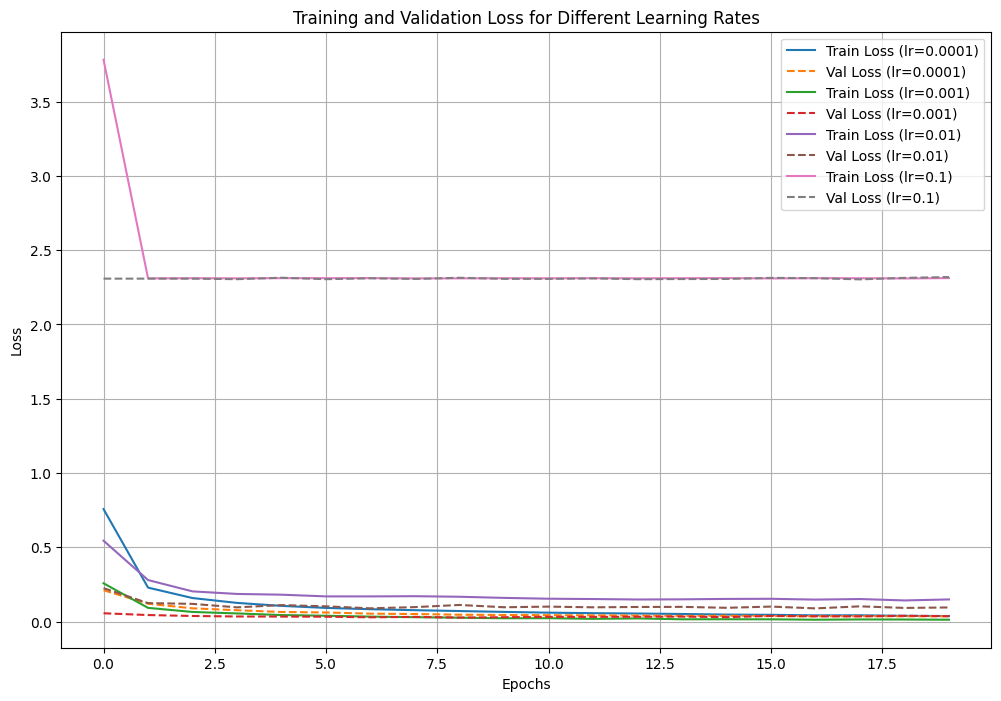

In [3]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from torch.optim import Adam
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Hyperparameters
BATCH_SIZE = 64
NUM_EPOCHS = 20
LEARNING_RATES = [0.0001, 0.001, 0.01, 0.1]

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Training function
def train_model(model, train_loader, val_loader, epochs, lr):
    optimizer = Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_loss, val_loss = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_loss.append(running_loss / len(train_loader))

        model.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                output = model(images)
                loss = criterion(output, labels)
                val_running_loss += loss.item()
        val_loss.append(val_running_loss / len(val_loader))

    return train_loss, val_loss

if __name__ == "__main__":
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ])

    mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    mnist_test = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

    train_size = int(0.8 * len(mnist_train))
    val_size = len(mnist_train) - train_size
    train_data, val_data = random_split(mnist_train, [train_size, val_size])

    train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=False)

    device = torch.device(
        "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
    )

    # Store losses for each learning rate
    all_train_losses = {}
    all_val_losses = {}

    for lr in LEARNING_RATES:
        print(f"Training with learning rate: {lr}")
        model = CNN().to(device)
        train_loss, val_loss = train_model(model, train_loader, val_loader, NUM_EPOCHS, lr)
        all_train_losses[lr] = train_loss
        all_val_losses[lr] = val_loss

    # Plot training and validation loss for different learning rates
    plt.figure(figsize=(12, 8))

    for lr in LEARNING_RATES:
        plt.plot(all_train_losses[lr], label=f"Train Loss (lr={lr})")
        plt.plot(all_val_losses[lr], linestyle="--", label=f"Val Loss (lr={lr})")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss for Different Learning Rates")
    plt.legend()
    plt.grid()
    plt.show()


In [4]:
print(device)

cpu


Epoch 1/20 - Train Loss: 0.2706, Val Loss: 0.0643
Epoch 2/20 - Train Loss: 0.0966, Val Loss: 0.0499
Epoch 3/20 - Train Loss: 0.0733, Val Loss: 0.0433
Epoch 4/20 - Train Loss: 0.0605, Val Loss: 0.0366
Epoch 5/20 - Train Loss: 0.0530, Val Loss: 0.0339
Epoch 6/20 - Train Loss: 0.0457, Val Loss: 0.0320
Epoch 7/20 - Train Loss: 0.0376, Val Loss: 0.0336
Epoch 8/20 - Train Loss: 0.0349, Val Loss: 0.0383
Epoch 9/20 - Train Loss: 0.0321, Val Loss: 0.0306
Epoch 10/20 - Train Loss: 0.0269, Val Loss: 0.0326
Epoch 11/20 - Train Loss: 0.0252, Val Loss: 0.0327
Epoch 12/20 - Train Loss: 0.0247, Val Loss: 0.0425
Epoch 13/20 - Train Loss: 0.0199, Val Loss: 0.0413
Epoch 14/20 - Train Loss: 0.0199, Val Loss: 0.0361
Epoch 15/20 - Train Loss: 0.0197, Val Loss: 0.0379
Epoch 16/20 - Train Loss: 0.0164, Val Loss: 0.0374
Epoch 17/20 - Train Loss: 0.0178, Val Loss: 0.0386
Epoch 18/20 - Train Loss: 0.0172, Val Loss: 0.0388
Epoch 19/20 - Train Loss: 0.0148, Val Loss: 0.0424
Epoch 20/20 - Train Loss: 0.0154, Val Lo

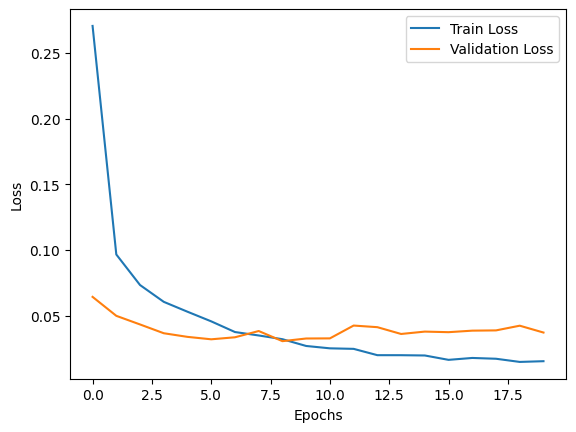

In [5]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Transform: normalize and convert to tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split training into training and validation
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
train_data, val_data = random_split(mnist_train, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  # No activation here
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)  # No activation here
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)  # Flattened size after convolutions
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU after conv1
        x = self.pool1(x)
        x = F.relu(self.conv2(x))  # Apply ReLU after conv2
        x = self.pool2(x)
        x = x.view(-1, 64 * 5 * 5)  # Flatten
        x = F.relu(self.fc1(x))  # Apply ReLU after fc1
        x = self.dropout(x)
        x = self.fc2(x)  # No activation on the output layer (handled by loss function)
        return F.log_softmax(x, dim=1)  # Log-Softmax for classification


from torch.optim import Adam
import matplotlib.pyplot as plt

# Training function
def train_model(model, train_loader, val_loader, epochs=20, lr=0.001):
    optimizer = Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_loss, val_loss = [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_loss.append(running_loss / len(train_loader))
        
        # Validation loss
        model.eval()
        val_running_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                output = model(images)
                loss = criterion(output, labels)
                val_running_loss += loss.item()
        val_loss.append(val_running_loss / len(val_loader))
        
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}")
    return train_loss, val_loss

# Initialize model, train and validate
device = torch.device("cpu")
model = CNN().to(device)
train_loss, val_loss = train_model(model, train_loader, val_loader)

# Plot losses
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate on test data
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            _, predicted = torch.max(output, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_model(model, test_loader)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
 [[ 975    1    0    0    0    0    1    2    1    0]
 [   0 1131    0    2    0    0    0    2    0    0]
 [   2    0 1026    0    0    0    0    3    1    0]
 [   0    0    1 1005    0    3    0   